## GOLD PRICE PREDICTION (2024)

Goal :->
Predict the Gold price based on features USD_INR etc.

Model: Linear Regression
We'll include:


1. Data Visualization
1. Data preprocessing (scaling)
2. Training the model
3. Evaluation (R² score, MAE, MSE)
4. Hyper parameter tuning
5. MLOPS
6. Predictive system


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## DATA COLLECTION
#### https://www.exchange-rates.org/exchange-rate-history/usd-inr-2024 using this official link to collect the gold rate exchanges

In [5]:
df = pd.read_csv('Datasets\Gold vs USDINR.csv')

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Admin\AppData\Local\Temp\ipykernel_10960\2594293801.py:1: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_csv('Datasets\Gold vs USDINR.csv')


In [6]:
df.head()

,Date,USD_INR,Goldrate
0,2024-01-01,83.240601,"₹5,066.31"
1,2024-01-08,83.076103,"₹4,966.31"
2,2024-01-15,83.160599,"₹5,015.33"
3,2024-01-22,83.146103,"₹4,950.84"
4,2024-01-29,82.927597,"₹4,976.77"


## DATA ANALYSIS AND CLEANING

In [7]:
df['Goldrate'] = df['Goldrate'].replace('₹','',regex=True).replace(',','',regex=True).astype(float)

In [8]:
df.head()

,Date,USD_INR,Goldrate
0,2024-01-01,83.240601,5066.31
1,2024-01-08,83.076103,4966.31
2,2024-01-15,83.160599,5015.33
3,2024-01-22,83.146103,4950.84
4,2024-01-29,82.927597,4976.77


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      53 non-null     object 
 1   USD_INR   53 non-null     float64
 2   Goldrate  53 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


### EDA

1. Handling Missing Values - No
2. Handling Imbalanced dataset - No
3. Handling Outliers - Seen
4. Encode Categorical features - No
5. Normalization vs Standadization - Standardize

In [10]:
import seaborn as sns

<Axes: ylabel='USD_INR'>

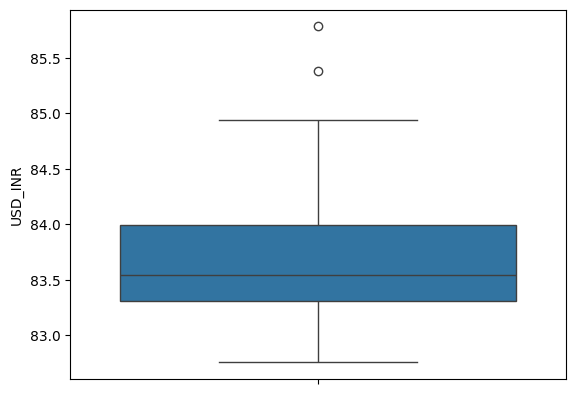

In [11]:
sns.boxplot(df['USD_INR'])

In [12]:
df['USD_INR'].max()

85.78659821

In [13]:
df['USD_INR'].min()

82.75229645

<Axes: xlabel='USD_INR', ylabel='Goldrate'>

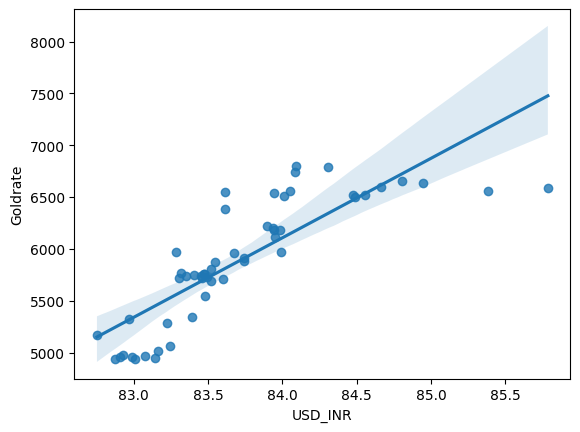

In [14]:
sns.regplot(x='USD_INR',y='Goldrate',data=df)

## MODEL TRAINING

In [15]:
X = df[['USD_INR']]
y = df['Goldrate']

In [16]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.1,random_state=7)


print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(47, 1)
(6, 1)
(47,)
(6,)


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled

array([[ 0.32505926],
       [ 0.01840315],
       [-1.14921814],
       [-0.98343705],
       [ 0.32160264],
       [-0.38080377],
       [ 1.13517073],
       [-0.48806243],
       [ 1.60579949],
       [ 0.30480018],
       [ 0.48333191],
       [-0.66794477],
       [-0.17542017],
       [ 0.31349899],
       [ 0.86227974],
       [-1.46922006],
       [-0.85667472],
       [ 0.37800758],
       [-0.64483568],
       [-0.61618683],
       [ 0.53988565],
       [ 0.38611121],
       [-0.19507262],
       [-1.11966506],
       [-0.50802393],
       [ 1.11342369],
       [ 1.40176651],
       [-1.08321016],
       [-0.75765702],
       [-0.73665396],
       [-1.28918895],
       [ 2.48193038],
       [-0.17181474],
       [ 0.52533803],
       [-0.35739709],
       [ 1.82032828],
       [-1.23202857],
       [ 3.08291547],
       [-0.57358552],
       [-0.08600551],
       [ 0.4167173 ],
       [-0.31433795],
       [-0.39235259],
       [-0.87842174],
       [-0.42116168],
       [-1

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [22]:
regressor.fit(X_train_scaled,Y_train)

LinearRegression()

In [23]:
regressor.coef_

array([511.69322955])

In [24]:
regressor.intercept_

5892.199574468085

In [25]:
# y= mx + c
m = regressor.coef_[0]
c = regressor.intercept_
m, c

(511.6932295485012, 5892.199574468085)

In [26]:
y_pred = regressor.predict(X_train_scaled)

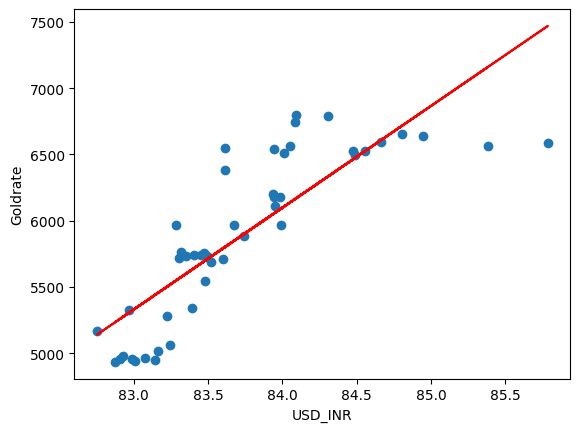

In [27]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,y_pred,color='r')
plt.xlabel('USD_INR')
plt.ylabel('Goldrate')
plt.show()

In [28]:
y_pred = regressor.predict(X_test_scaled)

In [29]:
y_pred

array([5693.73710853, 5728.59058791, 6017.69112853, 5748.93105813,
       5683.21840026, 5902.00288625])

In [30]:
Y_test 

22    5757.16
27    5803.07
34    6222.57
15    5874.86
18    5724.77
29    5909.38
Name: Goldrate, dtype: float64

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test (actual values) and y_pred (predicted values)
mae = mean_absolute_error(Y_test, y_pred)  # Lower is better
mse = mean_squared_error(Y_test, y_pred)  # Lower is better
rmse = mean_squared_error(Y_test, y_pred, squared=False)  # Lower is better
r2 = r2_score(Y_test, y_pred)  # Higher is better (max 1.0)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 86.27
Mean Squared Error (MSE): 11530.68
Root Mean Squared Error (RMSE): 107.38
R² Score: 0.58


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Hyperparameter Tunning

In [32]:
from sklearn.model_selection import RandomizedSearchCV
param_space = { 'copy_X' : [True,False],
                'fit_intercept' : [True,False],
                'n_jobs' : [1,5,10,15,None],
                'positive' : [True,False]}

In [33]:
search = RandomizedSearchCV(regressor, param_space, n_iter=50, cv=5)

In [34]:
search.fit(X_train,Y_train)

c:\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=50,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [35]:
search.best_params_

{'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}

In [36]:
tuned_model = LinearRegression(positive=True,n_jobs=1,fit_intercept=True,copy_X=True)

In [37]:
tuned_model.fit(X_train_scaled,Y_train)

LinearRegression(n_jobs=1, positive=True)

In [38]:
tuned_model.coef_

array([511.69322955])

In [39]:
tuned_model.intercept_

5892.199574468085

#### There is no big difference in the tuned model values so leave it as it as

## MLOPS

-> Save the model

-> Build the Interface

-> Connect Model with Interface

In [40]:
import pickle

In [41]:
pickle.dump(regressor,open('regressor.pkl','wb'))

In [42]:
regressor_reloaded = pickle.load(open('regressor.pkl','rb'))

In [43]:
regressor_reloaded.coef_

array([511.69322955])

In [44]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

### Predictive System

In [45]:
input_data = np.array([[82.5]])  # Example input for USD_INR
input_data_scaled = scaler.transform(input_data)    
predicted_price = regressor_reloaded.predict(input_data_scaled)
print(f"Predicted Gold Price for USD_INR 82.5: ₹{predicted_price[0]:.2f}")

Predicted Gold Price for USD_INR 82.5: ₹4946.73


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
